<a href="https://colab.research.google.com/github/nomchanz/graduation_thesis_new/blob/main/NN_1000_3000_seed(1)half_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
## 必要なライブラリのimport
import csv
import random
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, BatchNormalization
from keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [69]:
## データについて

### データフイルのpath
no_hole_path = 'no_hole_data.csv'
one_hole_size_path = 'one_hole_size_data.csv'
one_hole_position_path = 'one_hole_position_data.csv'
four_holes_size_path = 'four_holes_size_data.csv'
four_holes_position_path = 'four_holes_position_data.csv'
nine_holes_size_path = 'nine_holes_size_data.csv'
nine_holes_position_path = 'nine_holes_position_data.csv'
sixteen_holes_size_path = 'sixteen_holes_size_data.csv'
sixteen_holes_position_path = 'sixteen_holes_position_data.csv'
twentyfive_holes_size_path = 'twentyfive_holes_size_data.csv'
twentyfive_holes_position_path = 'twentyfive_holes_position_data.csv'

#### 穴0データ
with open(no_hole_path) as f0:
  lst_f0 = list(csv.reader(f0))
lst_f0 = [r[:-1] for r in lst_f0]

#### 大きさに関するデータ
with open(one_hole_size_path) as fs1:
  lst_fs1 = list(csv.reader(fs1))
with open(four_holes_size_path) as fs2:
  lst_fs2 = list(csv.reader(fs2))
with open(nine_holes_size_path) as fs3:
  lst_fs3 = list(csv.reader(fs3))
with open(sixteen_holes_size_path) as fs4:
  lst_fs4 = list(csv.reader(fs4))
with open(twentyfive_holes_size_path) as fs5:
  lst_fs5 = list(csv.reader(fs5))

#### 位置に関するデータ
with open(one_hole_position_path) as fp1:
  lst_fp1 = list(csv.reader(fp1))
with open(four_holes_position_path) as fp2:
  lst_fp2 = list(csv.reader(fp2))
with open(nine_holes_position_path) as fp3:
  lst_fp3 = list(csv.reader(fp3))
with open(sixteen_holes_position_path) as fp4:
  lst_fp4 = list(csv.reader(fp4))
with open(twentyfive_holes_position_path) as fp5:
  lst_fp5 = list(csv.reader(fp5))

### データ抽出(ランダムサンプリング)
n = 1000                    #総抽出データ数
train = 0.5                 #train:validのtrainデータの割合
a = 1
random.seed(a)

for i in range (1,6):
  #### 穴の大きさごとにデータをランダムにシャッフル→穴の大きさごとにtrain,valid,testに分割
  exec("lst_fs"+str(i)+"_shuffle = random.sample(lst_fs"+str(i)+", len(lst_fs"+str(i)+"))")  
  exec("lst_fs"+str(i)+"_train = lst_fs"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")       
  exec("lst_fs"+str(i)+"_valid = lst_fs"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]")          
  exec("lst_fs"+str(i)+"_test = lst_fs"+str(i)+"_shuffle["+str(int(n/5))+":-1]")
  exec("lst_fp"+str(i)+"_shuffle = random.sample(lst_fp"+str(i)+", len(lst_fp"+str(i)+"))")
  exec("lst_fp"+str(i)+"_train = lst_fp"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")
  exec("lst_fp"+str(i)+"_valid = lst_fp"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]") 
  exec("lst_fp"+str(i)+"_test = lst_fp"+str(i)+"_shuffle["+str(int(n/5))+":-1]")
  #### train,valid,testの各々について、大きさ、位置、表面温度分布データに分割
  exec("lst_x_fs"+str(i)+"_train = [r[0] for r in lst_fs"+str(i)+"_train]")
  exec("lst_x_fp"+str(i)+"_train = [r[0] for r in lst_fp"+str(i)+"_train]")
  exec("lst_y"+str(i)+"_train = [r[1:-1] for r in lst_fp"+str(i)+"_train]")
  exec("lst_x_fs"+str(i)+"_valid = [r[0] for r in lst_fs"+str(i)+"_valid]")
  exec("lst_x_fp"+str(i)+"_valid = [r[0] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_y"+str(i)+"_valid = [r[1:-1] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_x_fs"+str(i)+"_test = [r[0] for r in lst_fs"+str(i)+"_test]")
  exec("lst_x_fp"+str(i)+"_test = [r[0] for r in lst_fp"+str(i)+"_test]")
  exec("lst_y"+str(i)+"_test = [r[1:-1] for r in lst_fp"+str(i)+"_test]")

# lst_fs1_shuffle = random.sample(lst_fs1, len(lst_fs1))
# lst_fs2_shuffle = random.sample(lst_fs2, len(lst_fs2))
# lst_fs3_shuffle = random.sample(lst_fs3, len(lst_fs3))
# lst_fs4_shuffle = random.sample(lst_fs4, len(lst_fs4))
# lst_fs5_shuffle = random.sample(lst_fs5, len(lst_fs5))
# lst_fp1_shuffle = random.sample(lst_fp1, len(lst_fp1))
# lst_fp2_shuffle = random.sample(lst_fp2, len(lst_fp2))
# lst_fp3_shuffle = random.sample(lst_fp3, len(lst_fp3))
# lst_fp4_shuffle = random.sample(lst_fp4, len(lst_fp4))
# lst_fp5_shuffle = random.sample(lst_fp5, len(lst_fp5)) 



#lst_f0 = [r[:-1] for r in lst_f0]
# lst_x_fs1 = [r[0] for r in lst_fs1_sample]
# lst_x_fs2 = [r[0] for r in lst_fs2_sample]
# lst_x_fs3 = [r[0] for r in lst_fs3_sample]
# lst_x_fs4 = [r[0] for r in lst_fs4_sample]
# lst_x_fs5 = [r[0] for r in lst_fs5_sample]
# lst_x_fp1 = [r[0] for r in lst_fp1_sample]
# lst_x_fp2 = [r[0] for r in lst_fp2_sample]
# lst_x_fp3 = [r[0] for r in lst_fp3_sample]
# lst_x_fp4 = [r[0] for r in lst_fp4_sample]
# lst_x_fp5 = [r[0] for r in lst_fp5_sample]
# lst_y1 = [r[1:-1] for r in lst_fp1_sample]
# lst_y2 = [r[1:-1] for r in lst_fp2_sample]
# lst_y3 = [r[1:-1] for r in lst_fp3_sample]
# lst_y4 = [r[1:-1] for r in lst_fp4_sample]
# lst_y5 = [r[1:-1] for r in lst_fp5_sample]

### データを結合
lst_x_fs_train = lst_x_fs1_train + lst_x_fs2_train + lst_x_fs3_train + lst_x_fs4_train + lst_x_fs5_train
lst_x_fp_train = lst_x_fp1_train + lst_x_fp2_train + lst_x_fp3_train + lst_x_fp4_train + lst_x_fp5_train
lst_x_train = lst_x_fs_train + lst_x_fp_train
lst_y_train = lst_y1_train + lst_y2_train + lst_y3_train + lst_y4_train + lst_y5_train

lst_x_fs_valid = lst_x_fs1_valid + lst_x_fs2_valid + lst_x_fs3_valid + lst_x_fs4_valid + lst_x_fs5_valid
lst_x_fp_valid = lst_x_fp1_valid + lst_x_fp2_valid + lst_x_fp3_valid + lst_x_fp4_valid + lst_x_fp5_valid
lst_x_valid = lst_x_fs_valid + lst_x_fp_valid
lst_y_valid = lst_y1_valid + lst_y2_valid + lst_y3_valid + lst_y4_valid + lst_y5_valid

lst_x_fs_test = lst_x_fs1_test + lst_x_fs2_test + lst_x_fs3_test + lst_x_fs4_test + lst_x_fs5_test
lst_x_fp_test = lst_x_fp1_test + lst_x_fp2_test + lst_x_fp3_test + lst_x_fp4_test + lst_x_fp5_test
lst_x_test = lst_x_fs_test + lst_x_fp_test
lst_y_test = lst_y1_test + lst_y2_test + lst_y3_test + lst_y4_test + lst_y5_test

### np.arrayで変換
lst_f0 = np.array(lst_f0, dtype=float)
lst_x_train = np.array(lst_x_train, dtype=int)
lst_x_valid = np.array(lst_x_valid, dtype=int)
lst_x_test = np.array(lst_x_test, dtype=int)
lst_y_train = np.array(lst_y_train, dtype=float)
lst_y_valid = np.array(lst_y_valid, dtype=float)
lst_y_test = np.array(lst_y_test, dtype=float)


### データ加工
lst_x_train = lst_x_train.reshape(2,int(len(lst_x_train)/2))
lst_x_valid = lst_x_valid.reshape(2,int(len(lst_x_valid)/2))
lst_x_test = lst_x_test.reshape(2,int(len(lst_x_test)/2))
x_train = lst_x_train.T
x_valid = lst_x_valid.T
x_test = lst_x_test.T
y_train = lst_y_train - lst_f0
y_valid = lst_y_valid - lst_f0
y_test = lst_y_test - lst_f0

### train用とtest用に分割(4:1)
#x_train, x_test, y_train, y_test = train_test_split(lst_x, lst_y, train_size= 0.8, test_size=0.2)

#x_train = x_train.reshape(int(n*0.8),2,1)
#x_test = x_test.reshape(int(n*0.2),2,1)
#print(x_train.shape)
#print(x_test.shape)
#int(len(lst_x))
 

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
x_train_n = scaler_x.fit_transform(x_train)
x_valid_n = scaler_x.fit_transform(x_valid)
x_test_n = scaler_x.fit_transform(x_test) 

In [71]:
## NN

### modelの作成
model_8 = Sequential()
### 全結合層
model_8.add(Dense(10, activation='relu', input_dim=x_train.shape[1]))
model_8.add(Dense(25, activation='relu'))
model_8.add(Dense(50))
### バッチ正規化層
#model.add(BatchNormalization(epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
model_8.compile(loss='mse', optimizer=adam, metrics=['mae'])

In [72]:
# 学習
epochs = 4000
batch_size = 64
history = model_8.fit(x_train_n, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid_n, y_valid))

ストリーミング出力は最後の 5000 行に切り捨てられました。
Epoch 1501/4000
8/8 [==============================] - 0s 9ms/step - loss: 0.3011 - mae: 0.1654 - val_loss: 0.3079 - val_mae: 0.1762
Epoch 1502/4000
8/8 [==============================] - 0s 11ms/step - loss: 0.3694 - mae: 0.1692 - val_loss: 0.3082 - val_mae: 0.1753
Epoch 1503/4000
8/8 [==============================] - 0s 9ms/step - loss: 0.1657 - mae: 0.1520 - val_loss: 0.3093 - val_mae: 0.1761
Epoch 1504/4000
8/8 [==============================] - 0s 10ms/step - loss: 0.2913 - mae: 0.1636 - val_loss: 0.3091 - val_mae: 0.1777
Epoch 1505/4000
8/8 [==============================] - 0s 9ms/step - loss: 0.3705 - mae: 0.1709 - val_loss: 0.3094 - val_mae: 0.1774
Epoch 1506/4000
8/8 [==============================] - 0s 9ms/step - loss: 0.2042 - mae: 0.1450 - val_loss: 0.3094 - val_mae: 0.1773
Epoch 1507/4000
8/8 [==============================] - 0s 10ms/step - loss: 0.2338 - mae: 0.1549 - val_loss: 0.3101 - val_mae: 0.1772
Epoch 1508/4000
8/8 [=============

In [73]:
# モデルの評価
score = model_8.evaluate(x_test_n, y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

286/286 [==============================] - 0s 1ms/step - loss: 0.2452 - mae: 0.1459
Test loss: 0.24519048631191254
Test mae: 0.14594532549381256


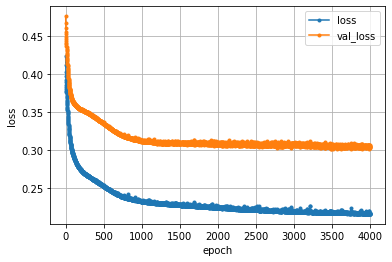

In [74]:
# 学習経過の可視化
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
for i in range(900):
  if max(loss)>2: 
    loss = loss[1:]
    val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

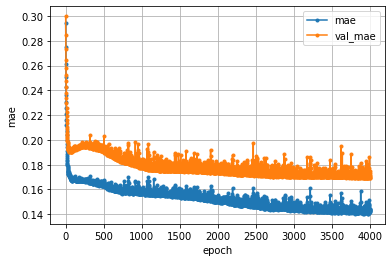

In [75]:
# 学習経過の可視化
mae     = history.history['mae']
val_mae = history.history['val_mae']

nb_epoch = len(mae)
for i in range(900):
  if max(mae)>2: 
    mae = mae[1:]
    val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae,     marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [76]:
model_8.save(str(n)+"_random.seed("+str(a)+")_NN_n_train0.5.h5")

In [77]:
### train:validのtrainデータの割合変更
n = 3000
train = 0.5                 #train:validのtrainデータの割合
a = 1
random.seed(a)

for i in range (1,6):
  #### 穴の大きさごとにデータをランダムにシャッフル→穴の大きさごとにtrain,valid,testに分割
  exec("lst_fs"+str(i)+"_shuffle = random.sample(lst_fs"+str(i)+", len(lst_fs"+str(i)+"))")  
  exec("lst_fs"+str(i)+"_train = lst_fs"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")       
  exec("lst_fs"+str(i)+"_valid = lst_fs"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]")          
  exec("lst_fs"+str(i)+"_test = lst_fs"+str(i)+"_shuffle["+str(int(n/5))+":-1]")
  exec("lst_fp"+str(i)+"_shuffle = random.sample(lst_fp"+str(i)+", len(lst_fp"+str(i)+"))")
  exec("lst_fp"+str(i)+"_train = lst_fp"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")
  exec("lst_fp"+str(i)+"_valid = lst_fp"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]") 
  exec("lst_fp"+str(i)+"_test = lst_fp"+str(i)+"_shuffle["+str(int(n/5))+":-1]")
  #### train,valid,testの各々について、大きさ、位置、表面温度分布データに分割
  exec("lst_x_fs"+str(i)+"_train = [r[0] for r in lst_fs"+str(i)+"_train]")
  exec("lst_x_fp"+str(i)+"_train = [r[0] for r in lst_fp"+str(i)+"_train]")
  exec("lst_y"+str(i)+"_train = [r[1:-1] for r in lst_fp"+str(i)+"_train]")
  exec("lst_x_fs"+str(i)+"_valid = [r[0] for r in lst_fs"+str(i)+"_valid]")
  exec("lst_x_fp"+str(i)+"_valid = [r[0] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_y"+str(i)+"_valid = [r[1:-1] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_x_fs"+str(i)+"_test = [r[0] for r in lst_fs"+str(i)+"_test]")
  exec("lst_x_fp"+str(i)+"_test = [r[0] for r in lst_fp"+str(i)+"_test]")
  exec("lst_y"+str(i)+"_test = [r[1:-1] for r in lst_fp"+str(i)+"_test]")

# lst_fs1_shuffle = random.sample(lst_fs1, len(lst_fs1))
# lst_fs2_shuffle = random.sample(lst_fs2, len(lst_fs2))
# lst_fs3_shuffle = random.sample(lst_fs3, len(lst_fs3))
# lst_fs4_shuffle = random.sample(lst_fs4, len(lst_fs4))
# lst_fs5_shuffle = random.sample(lst_fs5, len(lst_fs5))
# lst_fp1_shuffle = random.sample(lst_fp1, len(lst_fp1))
# lst_fp2_shuffle = random.sample(lst_fp2, len(lst_fp2))
# lst_fp3_shuffle = random.sample(lst_fp3, len(lst_fp3))
# lst_fp4_shuffle = random.sample(lst_fp4, len(lst_fp4))
# lst_fp5_shuffle = random.sample(lst_fp5, len(lst_fp5)) 



#lst_f0 = [r[:-1] for r in lst_f0]
# lst_x_fs1 = [r[0] for r in lst_fs1_sample]
# lst_x_fs2 = [r[0] for r in lst_fs2_sample]
# lst_x_fs3 = [r[0] for r in lst_fs3_sample]
# lst_x_fs4 = [r[0] for r in lst_fs4_sample]
# lst_x_fs5 = [r[0] for r in lst_fs5_sample]
# lst_x_fp1 = [r[0] for r in lst_fp1_sample]
# lst_x_fp2 = [r[0] for r in lst_fp2_sample]
# lst_x_fp3 = [r[0] for r in lst_fp3_sample]
# lst_x_fp4 = [r[0] for r in lst_fp4_sample]
# lst_x_fp5 = [r[0] for r in lst_fp5_sample]
# lst_y1 = [r[1:-1] for r in lst_fp1_sample]
# lst_y2 = [r[1:-1] for r in lst_fp2_sample]
# lst_y3 = [r[1:-1] for r in lst_fp3_sample]
# lst_y4 = [r[1:-1] for r in lst_fp4_sample]
# lst_y5 = [r[1:-1] for r in lst_fp5_sample]

### データを結合
lst_x_fs_train = lst_x_fs1_train + lst_x_fs2_train + lst_x_fs3_train + lst_x_fs4_train + lst_x_fs5_train
lst_x_fp_train = lst_x_fp1_train + lst_x_fp2_train + lst_x_fp3_train + lst_x_fp4_train + lst_x_fp5_train
lst_x_train = lst_x_fs_train + lst_x_fp_train
lst_y_train = lst_y1_train + lst_y2_train + lst_y3_train + lst_y4_train + lst_y5_train

lst_x_fs_valid = lst_x_fs1_valid + lst_x_fs2_valid + lst_x_fs3_valid + lst_x_fs4_valid + lst_x_fs5_valid
lst_x_fp_valid = lst_x_fp1_valid + lst_x_fp2_valid + lst_x_fp3_valid + lst_x_fp4_valid + lst_x_fp5_valid
lst_x_valid = lst_x_fs_valid + lst_x_fp_valid
lst_y_valid = lst_y1_valid + lst_y2_valid + lst_y3_valid + lst_y4_valid + lst_y5_valid

lst_x_fs_test = lst_x_fs1_test + lst_x_fs2_test + lst_x_fs3_test + lst_x_fs4_test + lst_x_fs5_test
lst_x_fp_test = lst_x_fp1_test + lst_x_fp2_test + lst_x_fp3_test + lst_x_fp4_test + lst_x_fp5_test
lst_x_test = lst_x_fs_test + lst_x_fp_test
lst_y_test = lst_y1_test + lst_y2_test + lst_y3_test + lst_y4_test + lst_y5_test

### np.arrayで変換
lst_f0 = np.array(lst_f0, dtype=float)
lst_x_train = np.array(lst_x_train, dtype=int)
lst_x_valid = np.array(lst_x_valid, dtype=int)
lst_x_test = np.array(lst_x_test, dtype=int)
lst_y_train = np.array(lst_y_train, dtype=float)
lst_y_valid = np.array(lst_y_valid, dtype=float)
lst_y_test = np.array(lst_y_test, dtype=float)


### データ加工
lst_x_train = lst_x_train.reshape(2,int(len(lst_x_train)/2))
lst_x_valid = lst_x_valid.reshape(2,int(len(lst_x_valid)/2))
lst_x_test = lst_x_test.reshape(2,int(len(lst_x_test)/2))
x_train = lst_x_train.T
x_valid = lst_x_valid.T
x_test = lst_x_test.T
y_train = lst_y_train - lst_f0
y_valid = lst_y_valid - lst_f0
y_test = lst_y_test - lst_f0

### train用とtest用に分割(4:1)
#x_train, x_test, y_train, y_test = train_test_split(lst_x, lst_y, train_size= 0.8, test_size=0.2)

#x_train = x_train.reshape(int(n*0.8),2,1)
#x_test = x_test.reshape(int(n*0.2),2,1)
#print(x_train.shape)
#print(x_test.shape)
#int(len(lst_x))
 

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
x_train_n = scaler_x.fit_transform(x_train)
x_valid_n = scaler_x.fit_transform(x_valid)
x_test_n = scaler_x.fit_transform(x_test) 

In [79]:
## NN

### modelの作成
model_5 = Sequential()
### 全結合層
model_5.add(Dense(10, activation='relu', input_dim=x_train.shape[1]))
model_5.add(Dense(25, activation='relu'))
model_5.add(Dense(50))
### バッチ正規化層
#model.add(BatchNormalization(epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
model_5.compile(loss='mse', optimizer=adam, metrics=['mae'])

In [80]:
# 学習
epochs = 4000
batch_size = 64
history = model_5.fit(x_train_n, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid_n, y_valid))

ストリーミング出力は最後の 5000 行に切り捨てられました。
Epoch 1501/4000
24/24 [==============================] - 0s 4ms/step - loss: 0.1950 - mae: 0.1461 - val_loss: 0.1829 - val_mae: 0.1476
Epoch 1502/4000
24/24 [==============================] - 0s 4ms/step - loss: 0.2344 - mae: 0.1616 - val_loss: 0.1823 - val_mae: 0.1465
Epoch 1503/4000
24/24 [==============================] - 0s 4ms/step - loss: 0.2495 - mae: 0.1613 - val_loss: 0.1814 - val_mae: 0.1470
Epoch 1504/4000
24/24 [==============================] - 0s 4ms/step - loss: 0.1993 - mae: 0.1546 - val_loss: 0.1837 - val_mae: 0.1487
Epoch 1505/4000
24/24 [==============================] - 0s 4ms/step - loss: 0.2012 - mae: 0.1574 - val_loss: 0.1821 - val_mae: 0.1481
Epoch 1506/4000
24/24 [==============================] - 0s 4ms/step - loss: 0.1834 - mae: 0.1546 - val_loss: 0.1823 - val_mae: 0.1479
Epoch 1507/4000
24/24 [==============================] - 0s 4ms/step - loss: 0.1736 - mae: 0.1388 - val_loss: 0.1824 - val_mae: 0.1461
Epoch 1508/4000
24/24 [

In [81]:
# モデルの評価
score = model_5.evaluate(x_test_n, y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

223/223 [==============================] - 0s 797us/step - loss: 0.2471 - mae: 0.1426
Test loss: 0.24714016914367676
Test mae: 0.14262472093105316


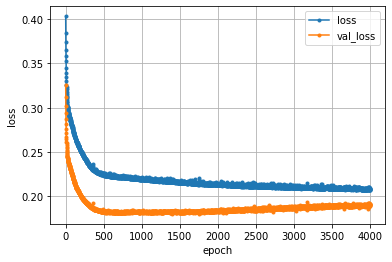

In [82]:
# 学習経過の可視化
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
for i in range(900):
  if max(loss)>2: 
    loss = loss[1:]
    val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

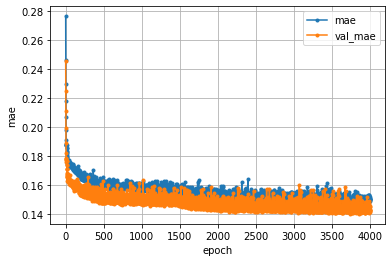

In [83]:
# 学習経過の可視化
mae     = history.history['mae']
val_mae = history.history['val_mae']

nb_epoch = len(mae)
for i in range(900):
  if max(mae)>2: 
    mae = mae[1:]
    val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae,     marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [84]:
model_5.save(str(n)+"_random.seed("+str(a)+")_NN_n_train0.5.h5")